In [1]:
import numpy as np
import matplotlib.pyplot as plt


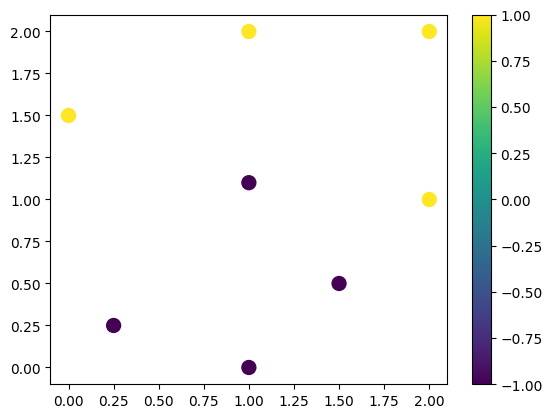

In [2]:
#initialize the test data
x = np.array([[0.25, 0.25], [1.5, 0.5], [1,0], [1, 1.1], [0,1.50], [2,1], [1,2], [2,2]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

#plot
x_coordinates = x[:, 0]
y_coordinates = x[:, 1]
plt.scatter(x_coordinates, y_coordinates, c=y, cmap='viridis', s=100)
plt.colorbar()

In [3]:
def optimize(X, Y, itters=10000, learning_rate=0.004, lambd=0.01):
  W = np.zeros(X.shape[1])
  B = 0

  for i in range(itters):
    for idx, x_i in enumerate(X):
      distance = 1 - Y[idx] * (np.dot(x_i, W) + B)
      if distance <= 0:
        W -= learning_rate * lambd * W
      else:
        W -= learning_rate *(lambd * W - x_i * Y[idx])
        B -= learning_rate * -Y[idx]

  return W, B

def predict(X, W, B):
  return np.dot(X, W)+ B


w, b = optimize( x, y)
print('the W vector: %s' %w.tolist())
print("constand: %f" %b.item())
print("prediction of the vector %s is %f" %( [1,1.5], predict([1,1.5], w, b).item()))

the W vector: [0.8047813928296446, 3.2255792371461154]
constand: -3.828000
prediction of the vector [1, 1.5] is 1.815150


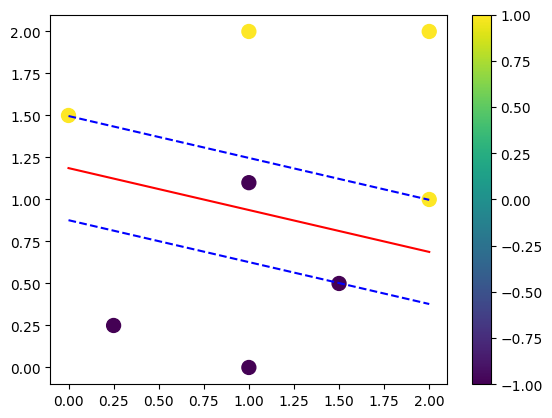

In [4]:
# to make a plot with boundries

def plot_with_lines(x, y, w, b):
  #plot the middel line
  x_1 = np.min(x[:,0])
  x_2 = np.max(x[:,0])
  y_1 = ((-b)-(w[0] * x_1))/w[1]
  y_2 = ((-b)-(w[0] * x_2))/w[1]
  y_high_1 = ((1-b)-(w[0] * x_1))/w[1]
  y_high_2 = ((1-b)-(w[0] * x_2))/w[1]
  y_low_1 = ((-1-b)-(w[0] * x_1))/w[1]
  y_low_2 = ((-1-b)-(w[0] * x_2))/w[1]


  x_coordinates = x[:, 0]
  y_coordinates = x[:, 1]
  plt.scatter(x_coordinates, y_coordinates, c=y, cmap='viridis', s=100)
  plt.plot([x_1, x_2], [y_1, y_2], 'r-')
  plt.plot([x_1, x_2], [y_high_1, y_high_2], 'b--')
  plt.plot([x_1, x_2], [y_low_1, y_low_2], 'b--')
  plt.colorbar()


plot_with_lines(x, y, w, b)

In [5]:
learning_rate=0.004
itters = 5000

# This model applies the gradients in a batch
# Also works, but I think the other one is nicer. In this case, you either need to devide by the number of 'points' and increase the itterations,
# or accept a lower accuracy since the gradient will be much bigger with each itteration.

def loss_gradient(W, B, X, Y, lambd=0.01):
  distance = 1 - Y * (np.dot(X, W) + B)

  grad_W = np.zeros(len(W))
  grad_B = 0
  for i in range(len(distance)):
    if distance[i] > 0:
      grad_W +=  lambd * W - X[i] * Y[i]
      grad_B += -Y[i]
    else:
      grad_W += lambd * W

  return grad_W, grad_B


w = np.zeros(x.shape[1])
b = 0

for i in range(itters):
  grad_w, grad_b = loss_gradient(w, b, x, y)
  w -= learning_rate * grad_w
  b -= learning_rate * grad_b

print('the W vector: %s' %w.tolist())
print("constand: %f" %b.item())

print("prediction of the vector %s is %f" %( [1,1.5], predict([1,1.5], w, b).item()))

the W vector: [0.7907981913212068, 3.1957545672154097]
constand: -3.808000
prediction of the vector [1, 1.5] is 1.776430


Now with a slightly larger dataset

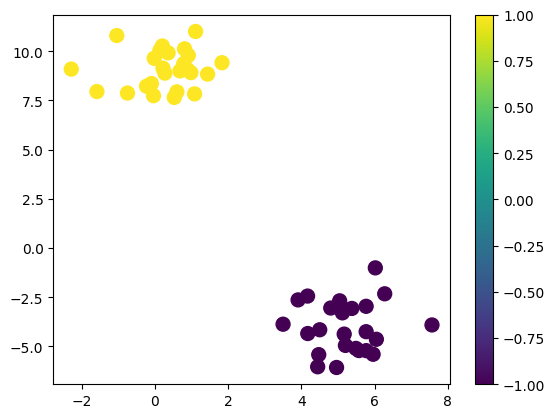

In [6]:
from sklearn.datasets import make_blobs
x_2, y_2 = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=23)

for i in range(len(y_2)):
   y_2[i] = 1 if y_2[i] == 0 else -1

x_coordinates = x_2[:, 0]
y_coordinates = x_2[:, 1]
plt.scatter(x_coordinates, y_coordinates, c=y_2, cmap='viridis', s=100)
plt.colorbar()

In [7]:
w_2, b_2 = optimize(x_2, y_2)
print('the W vector: %s' %w_2.tolist())
print("constand: %f" %b_2.item())
print("prediction of the vector %s is %f" %( [4,-2.5], predict([4,-2.5], w_2, b_2).item()))

the W vector: [-0.12609956979155548, 0.16888526496068693]
constand: -0.172000
prediction of the vector [4, -2.5] is -1.098611


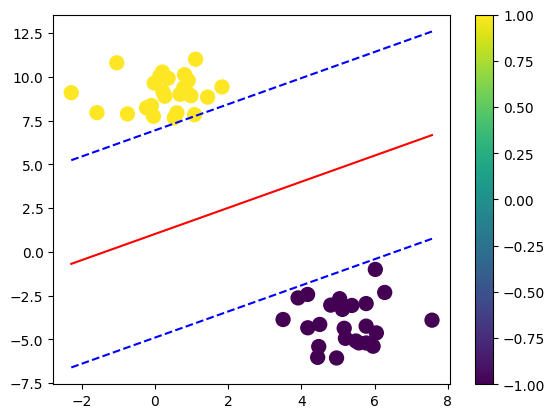

In [8]:
plot_with_lines(x_2, y_2, w_2, b_2)

Now with the MNIST dataset!

We will see how good this model (with the kerel trick) can separate the zero from the non-zero images.


In [18]:
import tensorflow_datasets as tfds
dataset = tfds.load('mnist', split='train[:30%]', shuffle_files=True)
print(len(dataset))


positive_images = []
negative_images = []
positive_targets = []
negative_targets = []


for data in dataset:
    # Get the images
    image = np.array(data['image']/255)
    image = image.reshape((-1))
    target = 1 if data['label'] == 0 else -1

    if target == 1:
      positive_images.append(image)
      positive_targets.append(target)
    else:
      negative_images.append(image)
      negative_targets.append(target)

# in the kernel trick, the similarity of each image with these images will be determined. the resulting 'similarity vectors' will than be used to train the model.
'''
vector_space = np.array(positive_images[:30] + negative_images[:70])
train_images = np.array(positive_images[30:1000] + negative_images[70:1100])
train_targets = np.array(positive_targets[30:1000] + negative_targets[70:1100])
test_images = np.array(positive_images[1000:] + negative_images[1100:])
test_targets = np.array(positive_targets[1000:] + negative_targets[1100:])
'''
vector_space = np.array(positive_images[:50] + negative_images[:50])
train_images = np.array(positive_images[50:1050] + negative_images[50:1050])
train_targets = np.array(positive_targets[50:1050] + negative_targets[50:1050])
test_images = np.array(positive_images[1050:] + negative_images[1050:])
test_targets = np.array(positive_targets[1050:] + negative_targets[1050:])


indices = np.random.permutation(len(train_images))
train_images = train_images[indices]
train_targets = train_targets[indices]

indices = np.random.permutation(len(test_images))
test_images = test_images[indices]
test_targets = test_targets[indices]

print(vector_space.shape)
print(train_images.shape)
print(train_targets.shape)
print(test_images.shape)
print(test_targets.shape)

18000
(100, 784)
(2000, 784)
(2000,)
(15900, 784)
(15900,)


In [19]:
def linear_kernel(u, v, n=2):
  return (np.dot(u, v) - 1) ** n

def rbf_kernel(X1, X2, gamma = 0.008):
    pairwise_dists = np.linalg.norm(X1[:, np.newaxis] - X2, axis=-1, ord = 2)  # Compute pairwise distances
    kernel_matrix = np.exp(-gamma * pairwise_dists ** 2)  # Apply the RBF kernel formula
    return kernel_matrix

#linear_kernel_matrix = linear_kernel(train_images, train_images.T, n=2)

rbf_kernel_matrix = rbf_kernel(train_images, vector_space)
print(rbf_kernel_matrix.shape)

(2000, 100)


In [22]:
w_3, b_3 = optimize(rbf_kernel_matrix, train_targets, itters=10000, learning_rate=0.004, lambd=0.01)

print('the W vector: %s' %w_3.tolist())
print("constand: %f" %b_3.item())

the W vector: [0.43576794419317577, 0.15416729505280666, 0.3214486754225878, 0.6199148869775858, 0.547591685664288, 0.31766667470263366, 0.3908767977664034, 0.1263976969484284, 0.13951440367134668, 0.3378882841873733, 0.48931052973737355, 0.2672902437805522, 0.5229235572042558, 0.5237221180764462, 0.1375393340897972, 0.6159421244492288, 0.3098005698908982, 0.42782054592033986, 0.14894658258893087, 0.21902380689020068, 0.5021159909647428, 0.34407544605507034, 0.3450593326399797, 0.5366653079452288, 0.21528527370470774, 0.38163147004115183, 0.2769448825080985, 0.5989990295440096, 0.26403651718291093, 0.39522394306319747, 0.45354833057833915, 0.2980726656509434, 0.42479858182304325, 0.5391312647285307, 0.3013657736890753, 0.39131279530084984, 0.513021821021796, 0.41314421078721875, 0.5490724291145399, 0.5625612164891505, 0.3653175497951376, 0.32706803732697104, 0.4252654317809576, 0.22164193856297623, 0.5301617862036455, 0.08238073028547772, 0.3360440689392033, 0.500643459599983, 0.230235

In [24]:
# testing the model with the test images

test_rbf_kernel_matrix = rbf_kernel(test_images[:5000], vector_space)

zeros_result = []
non_zeros_result = []
total_result = []
for i in range(len(test_rbf_kernel_matrix)):
  prediction = predict(test_rbf_kernel_matrix[i], w, b)
  prediction = -1 if prediction <=0 else 1

  total_result.append(1) if prediction == test_targets[i] else total_result.append(0)
  if test_targets[i] == 1:
    zeros_result.append(1) if prediction == test_targets[i] else zeros_result.append(0)
  if test_targets[i]== -1:
    non_zeros_result.append(1) if prediction == test_targets[i] else non_zeros_result.append(0)

print('Total accuracy: %f' %(sum(total_result)/len(total_result)))
print('accuracy of the zeros: %f' %(sum(zeros_result)/len(zeros_result)))
print('accuracy of the non-zeros: %f' %(sum(non_zeros_result)/len(non_zeros_result)))

#print(test_targets[390])
#print(predict(test_rbf_kernel_matrix[390], w, b))

Total accuracy: 0.980600
accuracy of the zeros: 0.934884
accuracy of the non-zeros: 0.982654
